In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file_path = 'DataScientist.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [3]:
# Create a new DataFrame with 'id' and 'job description'
job_description_df = df[['Job Description']].reset_index().rename(columns={'index': 'id'})

# Display the new DataFrame
job_description_df.head()

,id,Job Description
0,0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,1,"At Noom, we use scientifically proven methods ..."
2,2,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3,3,Sapphire Digital seeks a dynamic and driven mi...
4,4,"Director, Data Science - (200537)\nDescription..."


# Exploratory Data Analaysis (EDA)

Exploratory Data Analysis (EDA) is a crucial phase in the data analysis process, serving as an initial and fundamental exploration of a dataset's characteristics. During EDA, data analysts or scientists employ various statistical and visualization techniques to gain insights into the structure, patterns, and potential anomalies within the data. This process involves summarizing key statistical measures, visualizing distributions, identifying trends, and examining relationships between variables.

In [4]:
# Display basic information about the DataFrame
job_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3909 non-null   int64 
 1   Job Description  3909 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.2+ KB


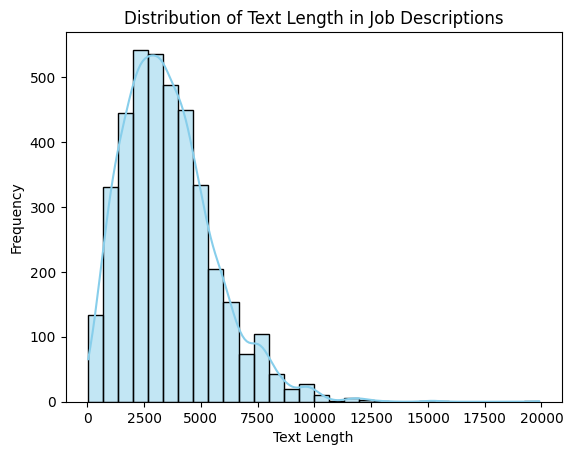

In [5]:
# Calculate text length for each job description
job_description_df['Text Length'] = job_description_df['Job Description'].apply(len)

# Plot the distribution of text length
sns.histplot(job_description_df['Text Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Length in Job Descriptions')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


<ipython-input-6-869eaebc6d70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


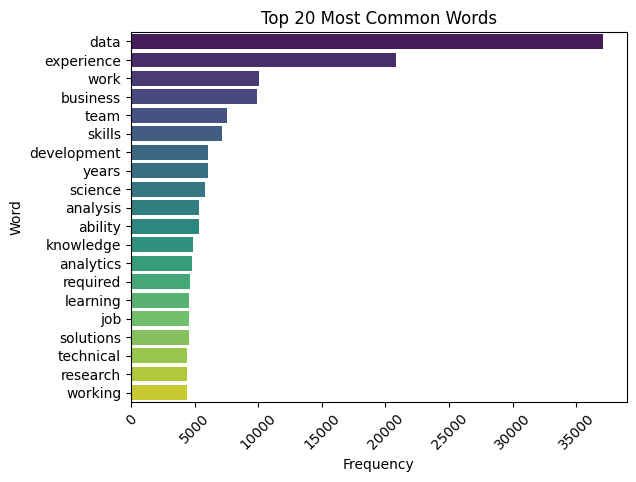

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Tokenize and count the most common words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(job_description_df['Job Description'])
word_freq = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])), columns=['Word', 'Frequency'])

# Display the top 20 most common words
top_words = word_freq.sort_values(by='Frequency', ascending=False).head(20)
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()



# PreProcessing The Data
1. Lowercasing the text.

2. Removing non-alphabetic characters.

3. Tokenizing the text using NLTK.

4. Lemmatizing using NLTK's WordNetLemmatizer.

5. Removing stop words

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [8]:
# Function for preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text using NLTK
    tokens = word_tokenize(text)

    # Lemmatization using NLTK's WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)

In [9]:
# Apply preprocessing to the 'Job Description' column
job_description_df['Preprocessed_Description'] = job_description_df['Job Description'].apply(preprocess_text)

In [10]:
job_description_df['Preprocessed_Description'].head()

0    hopper hopper mission make booking travel fast...
1    noom use scientifically proven method help use...
2    decodem httpswwwdecodemcom data science manage...
3    sapphire digital seek dynamic driven midlevel ...
4    director data science description edelman inte...
Name: Preprocessed_Description, dtype: object

# Part Of Speech (POS) Tagging
Part-of-Speech (POS) tagging is indispensable for keyword extraction due to its pivotal role in deciphering the syntactic structure and semantic nuances of text. By categorizing each word in a document into its grammatical type, POS tagging enables the identification of key elements such as nouns, verbs, and adjectives. This information is crucial for discerning the context and relationships between words, facilitating the extraction of meaningful keywords.

In [11]:
# Part-of-Speech Tagging (POS)
def pos_tagging(text):
    pos_tags = nltk.pos_tag(word_tokenize(text))
    return pos_tags

In [12]:
# Apply POS tagging to the preprocessed text
job_description_df['pos_tags'] = job_description_df['Preprocessed_Description'].apply(pos_tagging)

In [13]:
job_description_df = job_description_df.rename(columns={'pos_tags': 'POS_Tags'})

In [14]:
job_description_df['POS_Tags'].head()

0    [(hopper, JJ), (hopper, NN), (mission, NN), (m...
1    [(noom, NN), (use, NN), (scientifically, RB), ...
2    [(decodem, NN), (httpswwwdecodemcom, NN), (dat...
3    [(sapphire, NN), (digital, JJ), (seek, JJ), (d...
4    [(director, NN), (data, NNS), (science, NN), (...
Name: POS_Tags, dtype: object

# Named Entity Recognition (NER)
 NER plays a pivotal role in keyword extraction by identifying and categorizing entities within a given text. In the context of keyword extraction, entities often represent key terms, such as company names, locations, or specific products, that are instrumental for understanding the central themes and context of a document. NER helps distinguish between general words and proper nouns, ensuring that relevant and specific terms are prioritized during keyword extraction. By recognizing entities, NER contributes to the precision and relevance of the extracted keywords, as it aids in capturing domain-specific terminology and discerning the essential elements within a text

In [15]:
import spacy

# Load SpaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Named Entity Recognition (NER) using SpaCy
def ner_tagging_spacy(text):
    doc = nlp(text)
    return [(ent.label_, ent.text) for ent in doc.ents]

In [16]:
# Apply NER tagging to the preprocessed text using SpaCy
job_description_df['NER_Tags'] = job_description_df['Preprocessed_Description'].apply(ner_tagging_spacy)

In [17]:
job_description_df['NER_Tags'].head()

0    [(CARDINAL, one), (CARDINAL, one), (DATE, two ...
1              [(DATE, three week), (DATE, like year)]
2    [(GPE, new york), (GPE, new york city), (DATE,...
3    [(ORG, analystqa join), (ORG, new jersey), (DA...
4    [(DATE, day day), (NORP, kera), (CARDINAL, one...
Name: NER_Tags, dtype: object

# TF-IDF

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical statistic widely used in natural language processing and information retrieval to evaluate the importance of words within a document relative to a larger collection of documents, known as a corpus. The process begins with the calculation of term frequency (TF), representing how often a specific word appears in a given document. However, to avoid giving too much weight to commonly occurring words, the inverse document frequency (IDF) is then computed. IDF measures the rarity of a word across the entire corpus, emphasizing terms that are unique or distinctive to a particular document.

The TF-IDF score is obtained by multiplying the term frequency by the inverse document frequency. A high TF-IDF score indicates that a word is both frequent within a document and rare in the corpus, suggesting its significance in characterizing the content of that document.

In the context of extracting top keywords per description, TF-IDF serves as a valuable tool. By applying TF-IDF to preprocessed text data, we can generate a matrix where each row corresponds to a document (in this case, a job description) and each column represents a unique term in the entire corpus. The TF-IDF values in this matrix quantify the importance of each term within each document. To identify the top keywords, we sort these values for each document and select the terms with the highest TF-IDF scores. This process allows us to pinpoint the words that contribute the most to the uniqueness and significance of each job description, facilitating the extraction of key information such as job titles, company names, and other relevant details.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text
tfidf_matrix = tfidf_vectorizer.fit_transform(job_description_df['Preprocessed_Description'])

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Extract top TF-IDF keywords for each document
top_keywords_per_document = {}
# Iterate over each row (document) in the TF-IDF matrix
for i, row in enumerate(tfidf_matrix):
   # Find the indices of non-zero elements in the current row
    feature_index = row.nonzero()[1]

     # Create a list of tuples containing the feature index and its corresponding TF-IDF score
    tfidf_scores = zip(feature_index, [row[0, x] for x in feature_index])

    # Sort the feature indices based on their TF-IDF scores in descending order
    top_keywords = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:20]  # Adjust the number of top keywords as needed

    # Map the feature indices to their corresponding words and store in the dictionary
    top_keywords_per_document[i] = [(feature_names[index], score) for (index, score) in top_keywords]

# Add the top keywords to  DataFrame
job_description_df['Top_Keywords'] = job_description_df.index.map(top_keywords_per_document)


In [19]:
pd.set_option('display.max_colwidth', None)
print(job_description_df['Top_Keywords'].head())

0                                                     [(hopper, 0.5792959548117376), (travel, 0.24826658337255514), (app, 0.23050795920541203), (amplitude, 0.13920004980565714), (fastestgrowing, 0.11821711509131942), (nontechnical, 0.10961391952037897), (canada, 0.10735587165028251), (data, 0.10522113544688967), (extremely, 0.09731865182742161), (award, 0.09238481719456591), (large, 0.08841553229534985), (business, 0.08809927623462668), (ha, 0.08801183458375557), (webby, 0.08686230483661565), (praise, 0.08686230483661565), (tool, 0.08369349757974354), (tremendously, 0.07984349618059307), (traveler, 0.07984349618059307), (primed, 0.07984349618059307), (booking, 0.07984349618059307)]
1                  [(lifestyle, 0.1981436265175672), (like, 0.17229364786147056), (affect, 0.17105688686823625), (youll, 0.14469944481169325), (transcend, 0.1439452716235376), (similarlysized, 0.1439452716235376), (scientificallyproven, 0.1439452716235376), (hypertension, 0.1439452716235376), (obesity, 0.143

In [20]:
# Rename 'Text Length' to 'Original_Text_Length'
job_description_df = job_description_df.rename(columns={'Text Length': 'Original_Text_Length'})

# Add a new column 'Cleaned_Text_Length' for the length of preprocessed description
job_description_df['Cleaned_Text_Length'] = job_description_df['Preprocessed_Description'].apply(len)

In [21]:
# Reorder columns
column_order = ['id', 'Job Description', 'Original_Text_Length', 'Preprocessed_Description',
                'Cleaned_Text_Length', 'POS_Tags', 'NER_Tags', 'Top_Keywords']

# Reassign DataFrame with the new column order
job_description_df = job_description_df[column_order]

In [25]:
job_description_df.head()

,id,Job Description,Original_Text_Length,Preprocessed_Description,Cleaned_Text_Length,POS_Tags,NER_Tags,Top_Keywords
0,0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission to make booking travel faster, easier, and more transparent. We are leveraging the power that comes from combining massive amounts of data and machine learning to build the world’s fastest-growing travel app -- one that enables our customers to save money and travel more. With over $235M CAD in funding from leading investors in both Canada and the US, Hopper is primed to continue its path toward becoming the go-to way to book travel as the world continues its shift to mobile.\n\nRecognized as the fastest-growing travel app by Forbes and one of the world’s most innovative companies by Fast Company two years in a row, Hopper has been downloaded over 40 million times and has helped travelers plan over 100 million trips and counting. The app has received high praise in the form of mobile accolades such as the Webby Award for Best Travel App of 2019, the Google Play Award for Standout Startup of 2016 and Apple’s App Store Best of 2015.\n\nTake off with us!\n\nTHE ROLE\n\nHopper is looking for a data-savvy individual to join our team as a Data Scientist and lead data-centric product development and complex business intelligence projects within our core air travel business unit. Every day you would draw powerful insights from our real-time feed of billions of flight search results and archives of several trillion data points. To succeed at Hopper you need the talent, passion, and experience to thrive in a highly performing company.\nIN THIS ROLE YOU WILL:\nFrame and conduct complex exploratory analyses needed to deepen our understanding of Hopper users.\nPartner with product, business and strategy teams to leverage this user understanding for product improvements and other initiatives\nUse machine learning and big data tools on tremendously large and complex data sets to enhance our data-driven, personalized travel advice\nConduct research into various aspects of our business and employ statistical and modeling techniques when appropriate to make recommendations to non-technical stakeholders\nCreate advanced dashboards for product experiment tracking and business unit performance analysis using Amplitude and Tableau\nFind effective ways to simplify and communicate analyses to a non-technical audience.\nA PERFECT CANDIDATE HAS:\nA degree in Math, Statistics, Computer Science, Engineering or other quantitative disciplines\nExtremely strong analytical and problem-solving skills\nProven ability to communicate complex technical work to a non-technical audience\nA strong passion for and extensive experience in conducting empirical research and answering hard questions with data\nExperience with a data visualization tool (Tableau preferred) and project analysis tool such as Amplitude\nExperience with relational databases and SQL, especially Hive\nExperience working with extremely large data sets\nExperience in Pandas, R, SAS or other tools appropriate for large scale data preparation and analysis\nExperience with data mining, machine learning, statistical modeling tools and underlying algorithms\nProficiency with Unix/Linux environments\nBENEFITS\n\n• Well-funded and proven startup with large ambitions, competitive salary and stock options\n• Dynamic and entrepreneurial team where pushing limits is everyday business\n• 100% employer paid medical, dental, vision, disability and life insurance plans\n• Access to a 401k (US) or Retirement Savings Plan (Canada)",3417,hopper hopper mission make booking travel faster easier transparent leveraging power come combining massive amount data machine learning build world fastestgrowing travel app one enables customer save money travel cad funding leading investor canada u hopper primed continue path toward becoming goto way book travel world continues shift mobile recognized fastestgrowing travel app forbes one world innovative company f

In [23]:
# Assuming job_description_df is your DataFrame
job_description_df.to_csv('cleaned_job_description.csv', index=False)

In [31]:
import pandas as pd
import spacy
from nltk import word_tokenize, pos_tag, ne_chunk

# Assuming you have already loaded your DataFrame
# job_description_df = pd.read_csv('your_file.csv')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process text with spaCy once
def process_text(text):
    return nlp(text)

# Function to extract job title and company name
def extract_job_title_and_company(doc):
    job_title = None
    company_name = None
    for ent in doc.ents:
        if ent.label_ == "ORG":
            company_name = ent.text
        elif ent.label_ == "JOB_TITLE":
            job_title = ent.text
    return {'Job_Title': job_title, 'Company_Name': company_name} if job_title and company_name else {}

# Function to extract skills and qualifications
def extract_skills_and_qualifications(doc):
    skills = []
    qualifications = []
    for chunk in doc.noun_chunks:
        if "skill" in chunk.text.lower():
            skills.append(chunk.text)
        elif "qualification" in chunk.text.lower():
            qualifications.append(chunk.text)
    return {'Skills': skills, 'Qualifications': qualifications}

# Function to extract action verbs
def extract_action_verbs(doc):
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']
    return {'Action_Verbs': action_verbs}

# Function to extract company values and mission
def extract_company_values_and_mission(doc):
    company_values = []
    mission = []
    for sentence in doc.sents:
        if "values" in sentence.text.lower():
            company_values.append(sentence.text)
        elif "mission" in sentence.text.lower():
            mission.append(sentence.text)
    return {'Company_Values': company_values, 'Mission': mission}

# Function to extract data science industry-specific terms
def extract_data_science_terms(doc):
    data_science_terms = [token.text for token in doc if token.text.lower() in ['data science', 'machine learning', 'artificial intelligence']]
    return {'Data_Science_Terms': data_science_terms}

# Function to extract education and certifications
def extract_education_and_certifications(doc):
    education = []
    certifications = []
    for ent in doc.ents:
        if ent.label_ == "EDUCATION":
            education.append(ent.text)
        elif "certification" in ent.text.lower():
            certifications.append(ent.text)
    return {'Education': education, 'Certifications': certifications}

# Function to extract soft skills
def extract_soft_skills(doc):
    soft_skills = [token.text for token in doc if token.pos_ == 'ADJ']
    return {'Soft_Skills': soft_skills}

# Apply the functions to create new columns in the DataFrame








In [81]:
# Create a new DataFrame to store the extracted information
extracted_info_df = pd.DataFrame()
extracted_info_df['Processed_Text'] = job_description_df['Preprocessed_Description'].apply(process_text)


In [82]:
# Apply the functions to the first 5 rows and add the findings to the new DataFrame
extracted_info_df['Job_Title_Company'] = extracted_info_df['Processed_Text'].apply(extract_job_title_and_company)
extracted_info_df['Skills_Qualifications'] = extracted_info_df['Processed_Text'].apply(extract_skills_and_qualifications)
extracted_info_df['Action_Verbs'] = extracted_info_df['Processed_Text'].apply(extract_action_verbs)
extracted_info_df['Company_Values_Mission'] = extracted_info_df['Processed_Text'].apply(extract_company_values_and_mission)
extracted_info_df['Data_Science_Terms'] = extracted_info_df['Processed_Text'].apply(extract_data_science_terms)
extracted_info_df['Education_Certifications'] = extracted_info_df['Processed_Text'].apply(extract_education_and_certifications)
extracted_info_df['Soft_Skills'] = extracted_info_df['Processed_Text'].apply(extract_soft_skills)

extracted_info_df.head()

,Processed_Text,Job_Title_Company,Skills_Qualifications,Action_Verbs,Company_Values_Mission,Data_Science_Terms,Education_Certifications,Soft_Skills
0,"(hopper, hopper, mission, make, booking, travel, faster, easier, transparent, leveraging, power, come, combining, massive, amount, data, machine, learning, build, world, fastestgrowing, travel, app, one, enables, customer, save, money, travel, cad, funding, leading, investor, canada, u, hopper, primed, continue, path, toward, becoming, goto, way, book, travel, world, continues, shift, mobile, recognized, fastestgrowing, travel, app, forbes, one, world, innovative, company, fast, company, two, year, row, hopper, ha, downloaded, million, time, ha, helped, traveler, plan, million, trip, counting, app, ha, received, high, praise, form, mobile, accolade, webby, award, best, travel, app, google, play, award, standout, startup, apple, app, store, best, take, u, role, ...)",{},"{'Skills': ['extremely strong analytical problemsolving skill'], 'Qualifications': []}","{'Action_Verbs': ['make', 'travel', 'leveraging', 'come', 'combining', 'build', 'fastestgrowing', 'enables', 'save', 'leading', 'primed', 'continue', 'becoming', 'continues', 'recognized', 'fastestgrowing', 'forbes', 'downloaded', 'helped', 'counting', 'received', 'startup', 'take', 'looking', 'draw', 'succeed', 'need', 'thrive', 'performing', 'conduct', 'needed', 'deepen', 'understanding', 'learning', 'set', 'enhance', 'personalized', 'employ', 'make', 'create', 'tracking', 'using', 'find', 'simplify', 'communicate', 'proven', 'communicate', 'conducting', 'answering', 'preferred', 'sql', 'working', 'set', 'learning', 'underlying', 'wellfunded', 'proven', 'startup', 'pushing', 'paid']}","{'Company_Values': [], 'Mission': ['hopper hopper mission make booking travel faster easier transparent leveraging power come combining massive amount data machine learning build world fastestgrowing travel app one enables customer save money travel cad funding leading investor canada u hopper primed continue path toward becoming goto way book travel world continues shift mobile recognized fastestgrowing travel app forbes one world innovative company fast company two year row hopper ha downloaded million time ha helped traveler plan million trip counting app ha received high praise form mobile accolade webby award best travel app google play award standout startup apple app store best take u role hopper looking datasavvy individual join team data scientist lead datacentric product development complex business intelligence project within core air travel business unit every day would draw powerful insight realtime feed billion flight search result archive several trillion data point succeed hopper need talent passion experience thrive highly performing company role frame conduct complex exploratory analysis needed deepen understanding hopper user partner product business strategy team leverage user understanding product improvement initiative use machine learning big data tool tremendously large complex data set enhance datadriven personalized travel advice conduct research various aspect business employ statistical modeling technique appropriate make recommendation nontechnical stakeholder create advanced dashboard product experiment tracking business unit performance analysis using amplitude tableau find effective way simplify communicate analysis nontechnical audience perfect candidate ha degree math statistic computer science engineering quantitative discipline extremely strong analytical problemsolving skill proven ability communicate complex technical work nontechnical audience strong passion extensive experience conducting empirical research answering hard question data experience data visualization tool tableau preferred project analysis tool amplitude experience relational database sql especially hive experience working extremely large data set experience panda r sa tool appropriate large scale data preparation analysis experience data

In [76]:
# Assuming you have already applied the functions and created extracted_info_df

# Create empty sets for each category
job_title_company_set = set()
skills_qualifications_set = set()
action_verbs_set = set()
company_values_mission_set = set()
data_science_terms_set = set()
education_certifications_set = set()
soft_skills_set = set()

# Aggregate values into sets for each category
for row in extracted_info_df['Job_Title_Company']:
    if row:
        job_title_company_set.update(row.values())

for row in extracted_info_df['Skills_Qualifications']:
    if row:
        skills_qualifications_set.update(set(row['Skills'] + row['Qualifications']))

for row in extracted_info_df['Action_Verbs']:
    if row:
        action_verbs_set.update(row['Action_Verbs'])

for row in extracted_info_df['Company_Values_Mission']:
    if row:
        company_values_mission_set.update(set(row['Company_Values'] + row['Mission']))

for row in extracted_info_df['Data_Science_Terms']:
    if row:
        data_science_terms_set.update(row['Data_Science_Terms'])

for row in extracted_info_df['Education_Certifications']:
    if row:
        education_certifications_set.update(set(row['Education'] + row['Certifications']))

for row in extracted_info_df['Soft_Skills']:
    if row:
        soft_skills_set.update(row['Soft_Skills'])

In [77]:
# Display the sets
print("Job Title and Company Set:", job_title_company_set)

Job Title and Company Set: set()


In [85]:
print("Skills and Qualifications Set:", skills_qualifications_set)


Skills and Qualifications Set: {'Skills Understand', 'coding skills\nComputer vision expertise\nKnowledge', 'Required Job Skills', 'Preferred Qualifications\nTrack record', 'PREFERRED QUALIFICATIONS\nSupervisory experience', 'effectiveness\nQualifications\nAdvanced degree', 'excellent experimental skills', 'business tools\nStrong organizational skills', 'Computer SkillsTo', 'good coding skills\nExperience', 'JIRA skills', 'is preferred\nQualification Requirements', 'Strong analytical and creative problem-solving skills\nExperience', 'a small, highly skilled data science team', '• Strong verbal and written communication skills', 'organizational and problem solving skills', 'related work experience\nExcellent analytical skills', 'Strong organizational and time management skills Excellent MS Office', 'PowerPoint\n• Strong interpersonal communication skills', 'deep statistical skills', 'Exceptional analytic skills', 'Qualifications\n\nRequirements\nAbility', 'Supervisory/Managerial/Leaders

In [86]:
print("Action Verbs Set:", action_verbs_set)


Action Verbs Set: {'multi‐task', 'try', 'move', 'Striking', 'sending', 'Examine', 'coupled', 'decentralized', 'fosters', 'contract', 'Hire', 'Reinforce', 'round', 'hail', 'instilled', 'Let', 'Expanding', 'furthering', 'prompted', 'projecting', 'Exemplify', 'Raking', 'accumulated', 'SIGINT', 'canceled', 'mediated', 'Recommended', 'gaps', 'Utilized', 'cross', 'qualifying', 'occupying', 'drinks', '-writing', 'guaranteed', 'ingesting', 'merged', 'evaluate', 'aligns', 'elecommuting', 'Becoming', 'predisposed', 'Earns', 'Includes', 'focus', 'underlying', 'formats', 'thwart', 'selling', 'smell', 'shoulder', 'Elaborating', 'grading', 'nourish', 'CONTRIBUTE', 'innovativeapproaches', 'validated', 'Consolidates', 'succeed', 'archived', 'performance', 'responses.**Preferred', 'FILED', 'ushering', 'Established', 'purporting', 'Specifying', 'agree', '™', 'Acts', 'oversees', 'manifested', 'puts', 'thrives', 'usage', 'condensing', 'laying', 'rulesets', 'Inspiring', 'wrestle', 'operationalized', 'posse

In [87]:
print("Company Values and Mission Set:", company_values_mission_set)


Company Values and Mission Set: {'Our Values Are Our G-U-I-D-E\nGreat People-', 'The Associate will regularly work with financial, operational, and\nstakeholder data while conducting research and performing mission-critical\nstrategic assessments.\n\n', 'Our mission: Retail Data and Analytics Solutions has been established as a center of excellence for advanced analytics and data for Vanguard’s Retail business.', 'This is an opportunity to work closely with data scientists and threat analysts to curate the data that makes this mission possible.\n\n', 'The qualified candidate will become part of Aerospace’s Data Science and AI Department, where they will develop tools, prototypes and production systems and analytic applications for mission-critical space systems.\n\n', 'Strong background in machine learning, biostatistics, and bioinformatics\nWilling and eager to learn new skills\nExperience with large datasets and database use\nExperience with analysis of real-world observational healt

In [73]:
print("Data Science Terms Set:", data_science_terms_set)


Data Science Terms Set: set()


In [74]:
print("Education and Certifications Set:", education_certifications_set)


Education and Certifications Set: set()


In [75]:
print("Soft Skills Set:", soft_skills_set)

Soft Skills Set: set()


In [79]:
from collections import Counter

# Create empty Counters for each category
job_title_company_counter = Counter()
skills_qualifications_counter = Counter()
action_verbs_counter = Counter()
company_values_mission_counter = Counter()
data_science_terms_counter = Counter()
education_certifications_counter = Counter()
soft_skills_counter = Counter()

# Aggregate values into Counters for each category
for row in extracted_info_df['Job_Title_Company']:
    if row:
        job_title_company_counter.update(row.values())

for row in extracted_info_df['Skills_Qualifications']:
    if row:
        skills_qualifications_counter.update(row['Skills'] + row['Qualifications'])

for row in extracted_info_df['Action_Verbs']:
    if row:
        action_verbs_counter.update(row['Action_Verbs'])

for row in extracted_info_df['Company_Values_Mission']:
    if row:
        company_values_mission_counter.update(row['Company_Values'] + row['Mission'])

for row in extracted_info_df['Data_Science_Terms']:
    if row:
        data_science_terms_counter.update(row['Data_Science_Terms'])

for row in extracted_info_df['Education_Certifications']:
    if row:
        education_certifications_counter.update(row['Education'] + row['Certifications'])

for row in extracted_info_df['Soft_Skills']:
    if row:
        soft_skills_counter.update(row['Soft_Skills'])

# Get the top 50 words for each category
top_50_job_title_company = dict(job_title_company_counter.most_common(50))
top_50_skills_qualifications = dict(skills_qualifications_counter.most_common(50))
top_50_action_verbs = dict(action_verbs_counter.most_common(50))
top_50_company_values_mission = dict(company_values_mission_counter.most_common(50))
top_50_data_science_terms = dict(data_science_terms_counter.most_common(50))
top_50_education_certifications = dict(education_certifications_counter.most_common(50))
top_50_soft_skills = dict(soft_skills_counter.most_common(50))

# Display the top 50 words for each category
print("Top 50 Job Title and Company:", top_50_job_title_company)
print("Top 50 Skills and Qualifications:", top_50_skills_qualifications)
print("Top 50 Action Verbs:", top_50_action_verbs)
print("Top 50 Company Values and Mission:", top_50_company_values_mission)
print("Top 50 Data Science Terms:", top_50_data_science_terms)
print("Top 50 Education and Certifications:", top_50_education_certifications)
print("Top 50 Soft Skills:", top_50_soft_skills)


Top 50 Job Title and Company: {}
Top 50 Skills and Qualifications: {'skills': 600, 'Qualifications': 238, 'Skills': 229, 'Basic Qualifications': 113, 'Preferred Qualifications': 98, 'qualifications': 97, 'Strong analytical skills': 89, 'SKILLS': 83, 'skill': 67, 'organizational skills': 59, 'communication skills': 59, 'Required Skills': 58, 'strong interpersonal skills': 56, 'your skills': 52, 'new skills': 50, 'verbal and written communication skills': 49, 'the skills': 46, 'Strong communication skills': 46, 'Minimum Qualifications': 45, 'Strong interpersonal skills': 44, 'interpersonal skills': 43, 'problem-solving skills': 43, 'Excellent written and verbal communication skills': 43, 'Skill': 42, 'Required Qualifications': 41, 'Excellent communication skills': 41, 'qualification': 37, 'technical skills': 36, 'QUALIFICATIONS': 35, 'their foundational skills': 35, 'Strong programming skills': 34, 'analytical skills': 33, 'verbal communication skills': 33, 'their skills': 30, 'communica

{'job_title': '', 'company': 'ABC Tech', 'skills': [], 'qualifications': [], 'education': ''}

    Dear Hiring Manager,

    I am writing to express my interest in the  position at ABC Tech. 
    With my skills in  and a  degree, I am confident in my ability 
    to contribute effectively to your team. 

    My qualifications, including , align well with the requirements 
    outlined in your job posting. I am excited about the opportunity to contribute 
    to ABC Tech's mission and values.

    Thank you for considering my application. I look forward to the possibility of 
    discussing how my skills and experiences align with your needs.

    Sincerely,
    [Your Name]
    
